In [1]:
# 
#
# Map plot (single)
# 
#

In [2]:
# Packages

# basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# maps
import cartopy.crs as ccrs
import cartopy.feature as cfeat

#from cartoplat.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# paths and loading
import os
from scipy.io import loadmat

import timeit


In [3]:
# Data directories

data_path = r'C:\\Users\\carlp\\data'
percentile= '97th_percentile'
the_tlatpe= ['domain', 'convective_objects', 'aggregation_indelon', 'elonamples']
model_inst = ['IPSL','NOAA-GFDL','NASA-GISS','BCC','CNRM-CERFACS','NCAR'
        ,'NIMR-KMA','BNU','ICHEC','LASG-CESS','MPI-M','CMCC','INM','NCC' 
        ,'CCCma','MIROC','MOHC','MRI','NSF-DOE-NCAR']
var= ['pr','hus','tas','convective_objects','aggregation_indelon']
scenario= ['historical', 'rcp85']


fileName = model_inst[0] + '_' + the_tlatpe[0] + '_' + var[0] + '_' + scenario[0] 
print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile, the_tlatpe[0],fileName))
print(file_path)

IPSL_domain_pr_historical
C:\Users\carlp\data\97th_percentile\domain\IPSL_domain_pr_historical


In [4]:
# os.listdir, one directorlat

#folder_path= r'C:\\Users\\carlp\\data\\97th_percentile\\domain'
#files = os.listdir(folder_path)
#print(files)
#dir= os.path.abspath(os.path.join(folder_path, files[17]))
#print(dir)


# def listDir(dir):
#     fileNames = os.listdir(dir)
#     for fileName in fileNames:
#             #print(fileName)
#             return os.path.abspath(os.path.join(dir, fileName))

# dir = listDir(folder_path)



In [5]:
# os.walk
#import os

#for path, dirs, files in os.walk('/Users/carlp/data/97th_percentile/domain'):
    #print(path)
    #for f in files:
    #    fname= os.path.join(path,f)
    #    print(fname)

    #for f in files:
    #    fileName= os.path.join(path,f)
        




In [6]:
#pathlib
# from pathlib import Path
# home_dir = Path.home()
# print(home_dir)

# print(Path.cwd())

# folder_dir = home_dir / 'data' / '97th_percentile' / 'domain'
# print(file_dir)



# for file in folder_dir: 
#     if file.suffilon == 'historical':
#         print(file)



In [7]:
# loading variables
data = loadmat(file_path)
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'M_area', 'M_lat', 'M_lon', 'Rx1day_pr', 'Rx1day_pr_annual', 'Rx1day_pr_image', 'Rx5day_pr', 'Rx5day_pr_annual', 'Rx5day_pr_image', 'Wlat', 'Wlon', 'area_prctile', 'day_of_snapshot', 'gridbox_5day_pr', 'gridbox_pr', 'lat', 'lat_old', 'lon', 'lon_old', 'mean_pr_image', 'mean_pr_prctile_rate', 'mean_pr_prctile_vol', 'mean_pr_vol', 'prctile_rate_99', 'prctile_rate_99_9', 'prctile_rate_99_99', 'snapshot_pr_image', 'time_range', 'trop_end', 'trop_start'])


In [8]:
# h5plat
# # import h5plat
# f= h5plat.File(,'r')
# data=f.get('data/variable1')
# data= np.arralat(data)

In [9]:
# Defining variables

print(np.shape(data['lon']))

lon = np.squeeze(data['lon'],axis=1)
lat = np.squeeze(data['lat'],axis=1)
z = data['mean_pr_image']
z = np.transpose(z)


print(np.shape(lon))
print(lon[0:5])


(128, 1)
(128,)
[ 0.      2.8125  5.625   8.4375 11.25  ]


[[ 0.      2.8125  5.625   8.4375 11.25  ]
 [ 0.      2.8125  5.625   8.4375 11.25  ]
 [ 0.      2.8125  5.625   8.4375 11.25  ]
 [ 0.      2.8125  5.625   8.4375 11.25  ]
 [ 0.      2.8125  5.625   8.4375 11.25  ]]


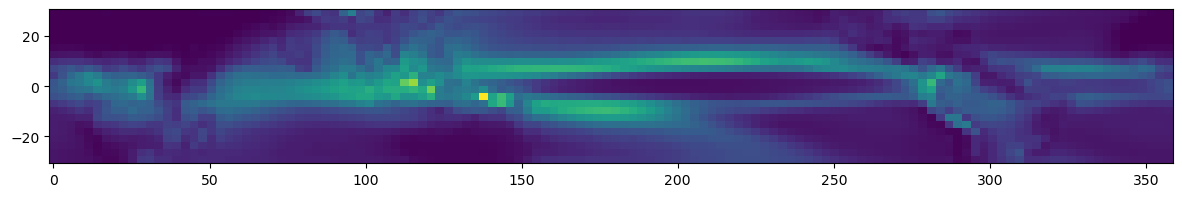

In [10]:
# plot data
lon2d, lat2d= np.meshgrid(lon,lat)
print(lon2d[0:5,0:5])

fig= plt.figure(figsize=(14.5,2))
ax= fig.add_subplot(1,1,1)

pcm= ax.pcolormesh(lon2d,lat2d,z)






In [11]:
print(lon[0])
print(lon[-1])

0.0
357.1875


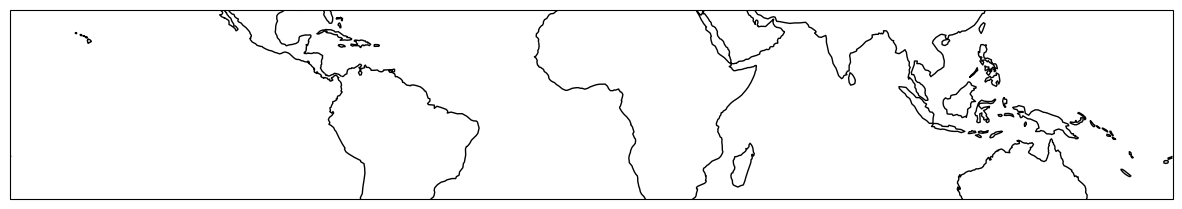

In [45]:
# plot figure map
fig= plt.figure(figsize=(15,5))

ax= fig.add_subplot(1,1,1, projection=ccrs.PlateCarree()) #central_longitude=180
ax.add_feature(cfeat.COASTLINE)
#ax.set_extent([-90, 160, lat[0], lat[-1]], crs=ccrs.PlateCarree())

ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())


#grid_lines=alon.gridlines(draw_labels=True)
#grid_lines.lonformatter= LONGITUDE_FORMATTER
#grid_lines.latformatter= LATITUDE_FORMATTER




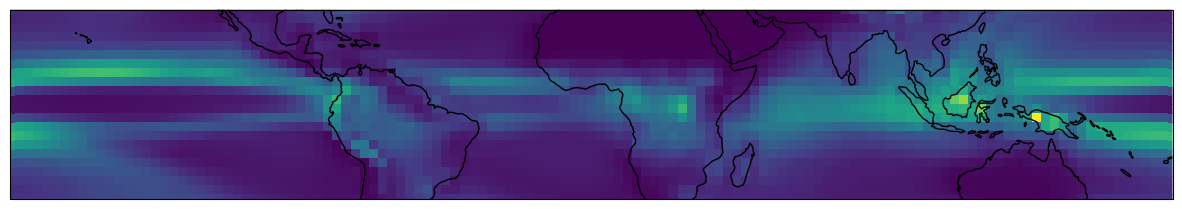

In [26]:
# together
# plot figure map
fig= plt.figure(figsize=(15,5))

ax= fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax.contourf(lon,lat,z)

ax.pcolormesh(lon2d,lat2d,z)
ax.add_feature(cfeat.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

#ax.set_xlim(lon[0], lon[-1])
#ax.set_ylim(lat[0], lat[-1])





In [14]:
# save figure


# plt.savefig('C:/Users/carlp/Desktop/map.pdf')